In [1]:
import json
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
team_tag_filename = "OSLOM/team_tags.txt"
feature_filename = "repo_features.json"

rcParams['axes.labelsize'] = 24
rcParams['ytick.labelsize'] = 24
rcParams['xtick.labelsize'] = 24
rcParams['axes.titlesize'] = 24
blue = "#3333FF"
red = "#FF3333"

save_dir = 'charts/'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [3]:
#Loading Languages & Topics...

topic_repos = {}
lang_repos = {}
with open(feature_filename) as tf:
    for line in tf.readlines():
        repo,feats = line.split('\t')
        feats = json.loads(feats)
        topics = feats['topics']
        for t in topics:
            if not t in topic_repos:
                topic_repos[t] = 0
            topic_repos[t] += 1
        
        langs = sorted(feats['languages'].items(),key=lambda x:x[1],reverse=True)[:2]
        langs = [l[0] for l in langs]
        for t in langs:
            if not t in lang_repos:
                lang_repos[t] = 0
            lang_repos[t] += 1


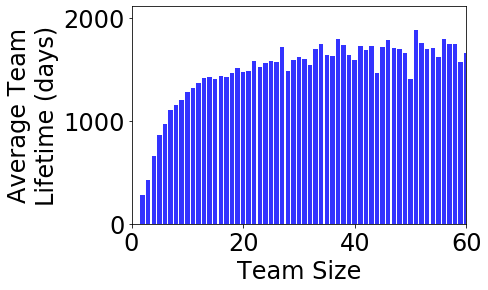

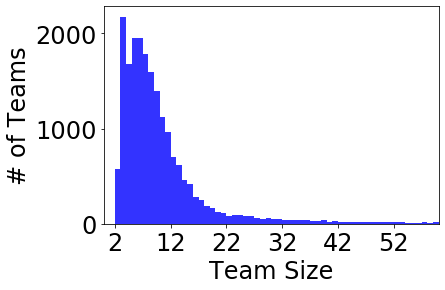

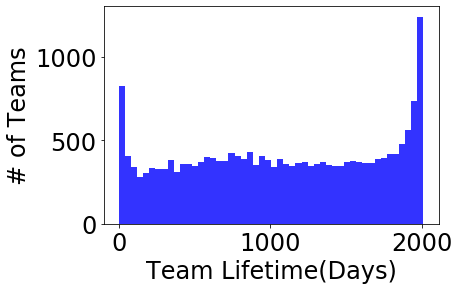

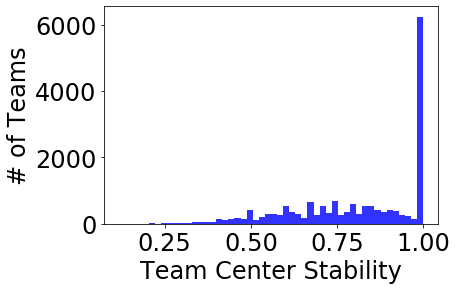

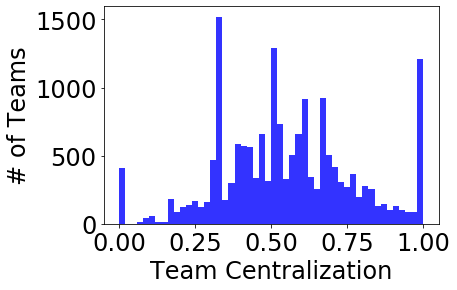

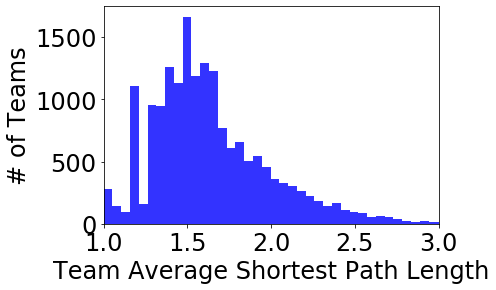

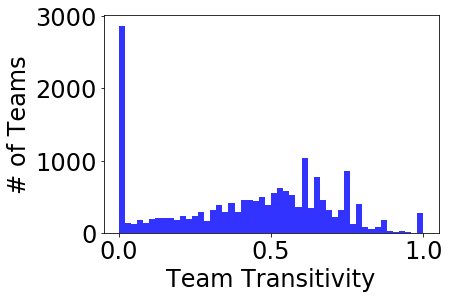

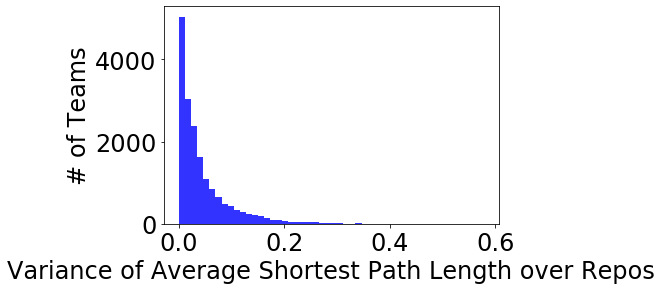

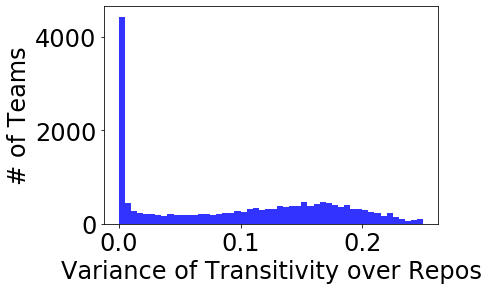

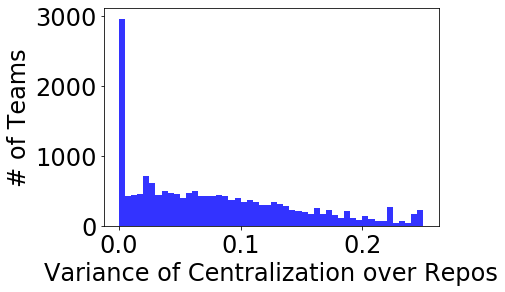

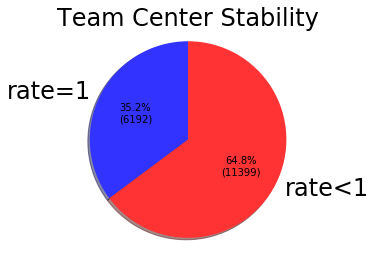

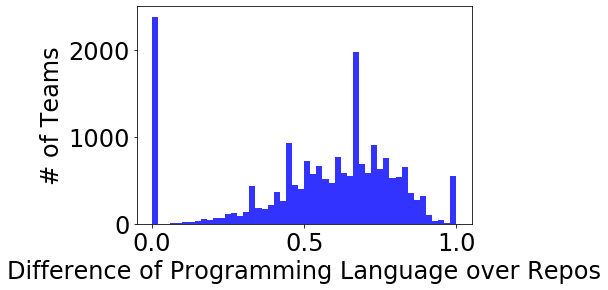

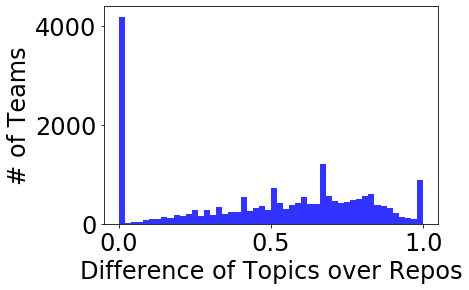

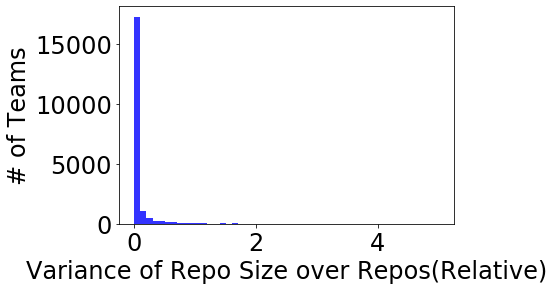

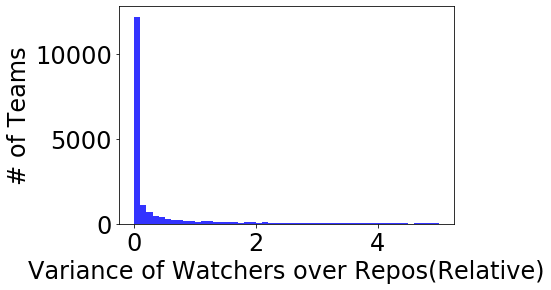

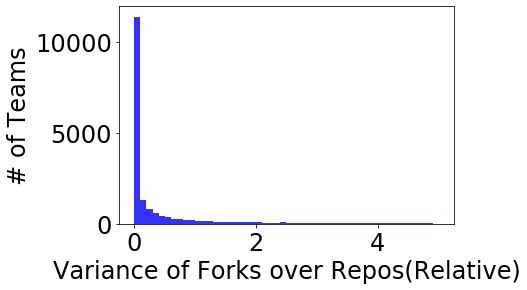

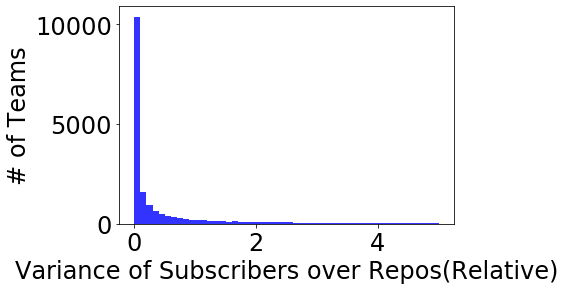

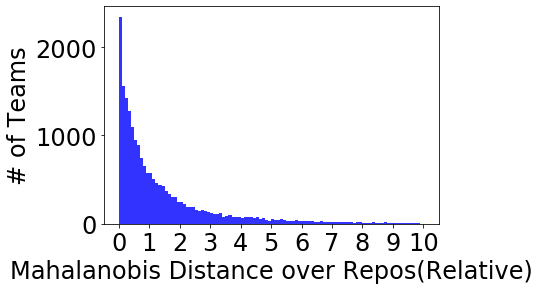

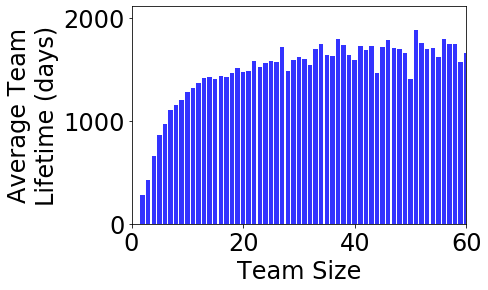

In [11]:
#Computing statistics...

teams = []
team_sizes = []
topic_cnts = {}
language_cnts = {}
team_centralizations = []
team_centralizations_repos = []
team_durations = []
team_contribution_rates = []
team_contribution_rates_repos = []
team_contribution_avg = []
team_center_rates = []
team_average_shortest_path_length = []
team_average_shortest_path_length_repos = []
team_average_clustering = []
team_average_clustering_repos = []
team_aspl_var = []
team_ac_var = []
team_cen_var = []
team_language_diff = []
team_topic_diff = []
team_reposize_diff = []
team_repowatchers_diff = []
team_repoforks_diff = []
team_reposubscribers_diff = []
team_repofeature_diff = []
team_size_repos = []
team_repo_sizes = []
team_size_vs_lifetime = {}
with open(team_tag_filename) as tmj:
    for tml in tmj.readlines():
        tml.strip()
        tm,dur,tp,lang,cntr,center,aspl,ac,cen,size,repo_size,lang_diff,topic_diff,size_diff,wtch_diff,fork_diff,sbscrb_diff,feature_diff = tml.split('\t')
        tm = json.loads(tm)
        if int(dur)==1 and len(tm)==2:
            continue
        teams.append(tm)
        team_sizes.append(len(tm))
        cntr = json.loads(cntr)
        aspl = json.loads(aspl)
        ac = json.loads(ac)
        cen = json.loads(cen)
        for topic in json.loads(tp):
            if topic in topic_cnts:
                topic_cnts[topic] += 1
            else:
                topic_cnts[topic] = 1
        for language in json.loads(lang):
            if language in language_cnts:
                language_cnts[language] += 1
            else:
                language_cnts[language] = 1
        repo_cnt = {}
        centers = json.loads(center)
        for repo in centers:
            for ctr in centers[repo]:
                if not ctr in repo_cnt:
                    repo_cnt[ctr] = 0
                repo_cnt[ctr] += 1
        if float(topic_diff)>=0:
            team_topic_diff.append(float(topic_diff))
        if float(lang_diff)>=0:
            team_language_diff.append(float(lang_diff))
        team_reposize_diff.append(float(size_diff))
        team_repowatchers_diff.append(float(wtch_diff))
        team_repoforks_diff.append(float(fork_diff))
        team_reposubscribers_diff.append(float(sbscrb_diff))
        team_repofeature_diff.append(float(feature_diff))
        if not len(tm) in team_size_vs_lifetime:
            team_size_vs_lifetime[len(tm)] = []
        team_size_vs_lifetime[len(tm)].append(int(dur))
        team_contribution_rates.append(cntr.pop('all'))
        team_contribution_avg.append(cntr.pop('avg_value'))
        team_contribution_rates_repos.append(cntr)
        team_durations.append(int(dur))
        team_size_repos.append(json.loads(size))
        team_repo_sizes.append(json.loads(repo_size))
        if len(tm) <= 3:
            continue
        team_center_rates.append(max(repo_cnt.values())/len(centers))
        team_average_shortest_path_length.append(aspl.pop('all'))
        team_average_clustering.append(ac.pop('all'))
        team_centralizations.append(cen.pop('all'))
        team_average_shortest_path_length_repos.append(aspl)
        team_average_clustering_repos.append(ac)
        team_centralizations_repos.append(cen)
        team_aspl_var.append(np.var(list(aspl.values())))
        team_ac_var.append(np.var(list(ac.values())))
        team_cen_var.append(np.var(list(cen.values())))
    


fig, ax = plt.subplots()
ax.hist(team_sizes,range=(2,100),bins=98,color=blue)
ax.set_xlim(left=0,right=60)
ax.set_xticks(list(range(2,60,10)))
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'TeamSize.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Size")
fig

fig, ax = plt.subplots()
ax.hist(team_durations,bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'TeamLifetime.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Lifetime(Days)")
fig

fig, ax = plt.subplots()
ax.hist(team_center_rates,bins=50,color=blue)
# ax.set_xlim(left=0,right=1)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'TeamCenterStability.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Center Stability")
fig

fig, ax = plt.subplots()
ax.hist(team_centralizations,bins=50,color=blue)
ax.set_ylabel("# of Teams")
ax.set_xticks([x*0.25 for x in range(5)])
fig.savefig(save_dir+'TeamCentralization.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Centralization")
fig

fig, ax = plt.subplots()
ax.hist(team_average_shortest_path_length,bins=50,color=blue)
ax.set_xlim(left=1,right=3)
ax.set_xticks([x/10 for x in range(10,31,5)])
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'TeamASPL.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Average Shortest Path Length")
fig

fig, ax = plt.subplots()
ax.hist(team_average_clustering,bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'TeamTransitivity.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Transitivity")
fig

fig, ax = plt.subplots()
ax.hist(team_aspl_var,bins=50,color=blue)
# ax.set_xlim(left=0,right=1)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarASPL.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Average Shortest Path Length over Repos")
fig


fig, ax = plt.subplots()
ax.hist(team_ac_var,bins=50,color=blue)
# ax.set_xlim(left=0,right=1)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarTransitivity.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Transitivity over Repos")
fig

fig, ax = plt.subplots()
ax.hist(team_cen_var,bins=50,color=blue)
# ax.set_xlim(left=0,right=1)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarCentralization.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Centralization over Repos")
fig


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
size = len([i for i in team_center_rates if i == 1])
ax.pie([size,len(team_center_rates)-size], labels=['rate=1','rate<1'], autopct=lambda pct: func(pct,[size,len(team_center_rates)-size]),startangle=90,
        shadow=True,colors=[blue,red])
ax.axis("equal")
fig.savefig(save_dir+'TeamCenterStabilityPie.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_title("Team Center Stability")
fig


fig, ax = plt.subplots()
ax.hist(team_language_diff,bins=50,color=blue)
# ax.set_xlim(left=0,right=1)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'DiffLanguage.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Difference of Programming Language over Repos")
fig

fig, ax = plt.subplots()
ax.hist(team_topic_diff,bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'DiffTopics.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Difference of Topics over Repos")
fig

fig, ax = plt.subplots()
ax.hist(team_reposize_diff,range=(0,5),bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarRepoSize.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Repo Size over Repos(Relative)")
fig

fig, ax = plt.subplots()
ax.hist(team_repowatchers_diff,range=(0,5),bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarWatchers.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Watchers over Repos(Relative)")
fig

fig, ax = plt.subplots()
ax.hist(team_repoforks_diff,range=(0,5),bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarForks.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Forks over Repos(Relative)")
fig

fig, ax = plt.subplots()
ax.hist(team_reposubscribers_diff,range=(0,5),bins=50,color=blue)
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'VarSubscribers.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Variance of Subscribers over Repos(Relative)")
fig

fig, ax = plt.subplots()
ax.hist(team_repofeature_diff,range=(0,10),bins=100,color=blue)
# ax.set_xlim(left=0,right=1)
ax.set_xticks(list(range(11)))
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'MahalanobisDistance.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Mahalanobis Distance over Repos(Relative)")
fig

# fig, ax = plt.subplots()
# size = len([i for i in team_contribution_rates if i >= 1])
# ax.pie([size,len(team_contribution_rates)-size], labels=['>=average','<average'], autopct=lambda pct: func(pct,[size,len(team_contribution_rates)-size]),
#         shadow=True,colors=[blue,red])
# ax.axis("equal")
# fig.savefig(save_dir+'TeamContributionPie.pdf',bbox_inches='tight')
# plt.close(fig)

fig, ax = plt.subplots()
ax.bar(team_size_vs_lifetime.keys(),[np.mean(s) for s in team_size_vs_lifetime.values()],color=blue)
ax.set_ylabel("Average Team\nLifetime (days)")
ax.set_xlim((0,60))
# ax.set_yscale("log")
fig.savefig(save_dir+'TeamSizeVsLifetime.pdf',bbox_inches='tight')
# plt.close(fig)
ax.set_xlabel("Team Size")
fig

In [5]:
def sort_to_k(ary,k,key=lambda x:x,reversed=False):
    k = min(k,len(ary))
    for i in range(k):
        for j in range(len(ary)-1-i):
            if not reversed:
                if key(ary[len(ary)-1-j]) < key(ary[len(ary)-2-j]):
                    ary[len(ary)-1-j],ary[len(ary)-2-j] = ary[len(ary)-2-j],ary[len(ary)-1-j]
            else:
                if key(ary[len(ary)-1-j]) > key(ary[len(ary)-2-j]):
                    ary[len(ary)-1-j],ary[len(ary)-2-j] = ary[len(ary)-2-j],ary[len(ary)-1-j]
    return ary


num_tms = 10
most_productive_teams_inds = sort_to_k(list(range(len(teams))),num_tms,key=lambda x:team_contribution_avg[x], reversed=True)[:num_tms]
for i in most_productive_teams_inds:
    print("%s\t%d\t%f\t%s\t%d\t%d days"%(teams[i][:4],team_sizes[i],team_contribution_avg[i],list(team_contribution_rates_repos[i].keys())[:5],len(team_contribution_rates_repos[i]),team_durations[i]))

['swarren', 'anholt', 'stschake', 'trini', 'danvet', 'wdenx', 'gurchetansingh', 'michalsimek', 'itoral']	9	142988.444444	['metasepi/linux-bohai-s1', 'ayufan-rock64/linux-kernel', 'percy-g2/android_kernel_motorola_msm8610', 'raspberrypi/linux', 'linux4kix/linux-linaro-stable-mx6']	595	1422 days
['nickdesaulniers', 'ana', 'EmbeddedAndroid', 'jhnikula', 'andy-shev', 'broonie', 'khilman', 'MiloCasagrande', 'mattface', 'gctucker', 'loysollivier', 'montjoie']	12	128949.583333	['visi0nary/android_kernel_elephone_p8000', 'txuki2005/TaUrUs_Kernel', 'bryan2894/android_kernel_samsung_msm8660-common', 'HazouPH/android_kernel_motorola_smi', 'zf5/android_kernel_asus_T00F']	348	1622 days
['yann-morin-1998', 'jerome-pouiller', 'gregkh', 'tpetazzoni', 'anisse', 'mripard', 'gclement', 'haklai', 'tSed', 'rmsilva', 'smvoss', 'giuliobenetti', 'jmbents', 'hthiery', 'gregungerer']	15	104278.800000	['jcmvbkbc/crosstool-NG', 'crosstool-ng/crosstool-ng', 'rmyorston/busybox-w32', 'ccrisan/motionPie', 'mireq/buil

In [6]:
team_topics = sorted(topic_cnts.items(),key=lambda x:x[1],reverse=True)
team_languages = sorted(language_cnts.items(),key=lambda x:x[1],reverse=True)

tops = 10
fig, ax = plt.subplots()
ax.bar(range(tops),[lb[1] for lb in team_topics[:tops]],color=blue)
ax.set_xticks([x+0.5 for x in range(tops)])
ax.set_xticklabels([lb[0] for lb in team_topics[:tops]])
# ax.set_xlabel("Team Topics(Top %d)"%tops)
ax.set_ylabel("# of Teams")
fig.autofmt_xdate()
fig.savefig(save_dir+'TeamTopics.pdf',bbox_inches='tight')
plt.close(fig)

langs = 10
fig, ax = plt.subplots()
ax.bar(range(langs),[lb[1] for lb in team_languages[:langs]],color=blue)
ax.set_xticks([x+0.5 for x in range(langs)])
ax.set_xticklabels([lb[0] for lb in team_languages[:langs]])
# ax.set_xlabel("Team Languages(Top %d)"%langs)
ax.set_ylabel("# of Teams")
fig.autofmt_xdate()
fig.savefig(save_dir+'TeamLanguages.pdf',bbox_inches='tight')
plt.close(fig)

In [7]:
# team_centralizations_repos_unfold = {}
# team_average_shortest_path_length_repos_unfold = {}
# team_average_clustering_repos_unfold = {}
# team_size_repos_unfold = {}
# team_aspl_var_con = {}
# team_ac_var_con = {}
# team_cen_var_con = {}

# for i in range(len(team_average_clustering_repos)):
#     for repo in team_average_clustering_repos[i]:
#         if team_average_shortest_path_length_repos[i][repo] not in team_average_shortest_path_length_repos_unfold:
#             team_average_shortest_path_length_repos_unfold[team_average_shortest_path_length_repos[i][repo]] = []
#         team_average_shortest_path_length_repos_unfold[team_average_shortest_path_length_repos[i][repo]].append(team_contribution_rates_repos[i][repo])
#         if team_average_clustering_repos[i][repo] not in team_average_clustering_repos_unfold:
#             team_average_clustering_repos_unfold[team_average_clustering_repos[i][repo]] = []
#         team_average_clustering_repos_unfold[team_average_clustering_repos[i][repo]].append(team_contribution_rates_repos[i][repo])
#         if team_centralizations_repos[i][repo] not in team_centralizations_repos_unfold:
#             team_centralizations_repos_unfold[team_centralizations_repos[i][repo]] = []
#         team_centralizations_repos_unfold[team_centralizations_repos[i][repo]].append(team_contribution_rates_repos[i][repo])
#         if team_centralizations_repos[i][repo] not in team_centralizations_repos_unfold:
#             team_centralizations_repos_unfold[team_centralizations_repos[i][repo]] = []
#         team_centralizations_repos_unfold[team_centralizations_repos[i][repo]].append(team_contribution_rates_repos[i][repo])
#         if team_size_repos[i][repo] not in team_size_repos_unfold:
#             team_size_repos_unfold[team_size_repos[i][repo]] = []
#         team_size_repos_unfold[team_size_repos[i][repo]].append(team_contribution_rates_repos[i][repo])
#         if team_ac_var[i] not in team_ac_var_con:
#             team_ac_var_con[team_ac_var[i]] = []
#         team_ac_var_con[team_ac_var[i]].append(team_contribution_rates_repos[i][repo])
#         if team_cen_var[i] not in team_cen_var_con:
#             team_cen_var_con[team_cen_var[i]] = []
#         team_cen_var_con[team_cen_var[i]].append(team_contribution_rates_repos[i][repo])
#         if team_aspl_var[i] not in team_aspl_var_con:
#             team_aspl_var_con[team_aspl_var[i]] = []
#         team_aspl_var_con[team_aspl_var[i]].append(team_contribution_rates_repos[i][repo])



# fig, ax = plt.subplots()
# ax.scatter(list(team_average_shortest_path_length_repos_unfold.keys()),[np.mean(s) for s in team_average_shortest_path_length_repos_unfold.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Average Shortest Path Length")
# fig.savefig(save_dir+'Contribution_vs_ASPL.pdf',bbox_inches='tight')
# plt.close(fig)

# fig, ax = plt.subplots()
# ax.scatter(list(team_centralizations_repos_unfold.keys()),[np.mean(s) for s in team_centralizations_repos_unfold.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Centralization")
# ax.set_xlim((0,1))
# fig.savefig(save_dir+'Contribution_vs_Centralization.pdf',bbox_inches='tight')
# plt.close(fig)


# fig, ax = plt.subplots()
# ax.scatter(list(team_average_clustering_repos_unfold.keys()),[np.mean(s) for s in team_average_clustering_repos_unfold.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Transitivity")
# ax.set_xlim((0,1))
# fig.savefig(save_dir+'Contribution_vs_Transitivity.pdf',bbox_inches='tight')
# plt.close(fig)

# fig, ax = plt.subplots()
# ax.bar(list(team_size_repos_unfold.keys()),[np.mean(s) for s in team_size_repos_unfold.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Team Size")
# ax.set_xlim((0,100))
# fig.savefig(save_dir+'Contribution_vs_Size.pdf',bbox_inches='tight')
# plt.close(fig)

# fig, ax = plt.subplots()
# ax.scatter(list(team_aspl_var_con.keys()),[np.mean(s) for s in team_aspl_var_con.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Variance of Average Shortest Path Length")
# # ax.set_xlim((0,1))
# fig.savefig(save_dir+'Contribution_vs_VarASPL.pdf',bbox_inches='tight')
# plt.close(fig)

# fig, ax = plt.subplots()
# ax.scatter(list(team_cen_var_con.keys()),[np.mean(s) for s in team_cen_var_con.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Variance of Centralization")
# # ax.set_xlim((0,1))
# fig.savefig(save_dir+'Contribution_vs_VarCentralization.pdf',bbox_inches='tight')
# plt.close(fig)

# fig, ax = plt.subplots()
# ax.scatter(list(team_ac_var_con.keys()),[np.mean(s) for s in team_ac_var_con.values()],color=blue)
# ax.set_ylabel("Team Contribution Rates")
# ax.set_yscale("log")
# ax.set_xlabel("Variance of Transitivity")
# # ax.set_xlim((0,1))
# fig.savefig(save_dir+'Contribution_vs_VarTransitivity.pdf',bbox_inches='tight')
# plt.close(fig)


# right_lim = 20
# fig, ax = plt.subplots()
# ax.hist(team_contribution_rates,bins=right_lim,range=(0,right_lim),color=blue)
# ax.set_xlabel("Team Contribution Rates(Compared with average contribution)")
# # ax.set_xlim(left=0,right=10)
# # ax.set_xscale("log")
# ax.set_xticks(list(range(0,right_lim)))
# ax.set_ylabel("Count")

In [8]:
team_size_vs_repo_size = {}
team_size_over_repo_size = []

for i in range(len(team_size_repos)):
    for repo in team_size_repos[i]:
        if not team_size_repos[i][repo] in team_size_vs_repo_size:
            team_size_vs_repo_size[team_size_repos[i][repo]] = []
        team_size_vs_repo_size[team_size_repos[i][repo]].append(team_repo_sizes[i][repo])
        team_size_over_repo_size.append(team_size_repos[i][repo]/team_repo_sizes[i][repo])

        
fig, ax = plt.subplots()
ax.hist(team_size_over_repo_size,range=(0,1),bins=50,color=blue)
ax.set_xticks([x/10 for x in range(0,11,2)])
ax.set_ylabel("# of Teams")
fig.savefig(save_dir+'TeamSizeOverRepoSize.pdf',bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
ax.bar(team_size_vs_repo_size.keys(),[np.mean(s) for s in team_size_vs_repo_size.values()],color=blue)
ax.set_ylabel("Average # of Contributors\n in the Repo")
ax.set_xlim((0,60))
fig.savefig(save_dir+'TeamSizeVsRepoSize.pdf',bbox_inches='tight')
plt.close(fig)

In [9]:
# topic_ratio = {}
# lang_ratio = {}
# for topic in topic_repos:
#     if not topic in  topic_cnts:
#         topic_ratio[topic] = 0
#     else:
#         topic_ratio[topic] = topic_cnts[topic]/topic_repos[topic]
# for lang in lang_repos:
#     if not lang in  language_cnts:
#         lang_ratio[lang] = 0
#     else:
#         lang_ratio[lang] = language_cnts[lang]/lang_repos[lang]

# topic_ratio_list = sorted(topic_ratio.items(),key=lambda x:x[1],reverse=True)
# lang_ratio_list = sorted(lang_ratio.items(),key=lambda x:x[1],reverse=True)

# tops = 10
# fig, ax = plt.subplots()
# ax.bar(range(tops),[lb[1] for lb in topic_ratio_list[:tops]],color=blue)
# ax.set_xticks([x+0.5 for x in range(tops)])
# ax.set_xticklabels([lb[0] for lb in topic_ratio_list[:tops]],fontsize=20)
# # ax.set_xlabel("Team Topics(Top %d)"%tops)
# ax.set_ylabel("Average # of Teams in Repository",fontsize=20)
# # ax.set_yscale("log")
# fig.autofmt_xdate()
# fig.savefig(save_dir+'TeamRatioTopics.pdf',bbox_inches='tight')
# plt.close(fig)
# # for topic in [t[0] for t in topic_ratio][:tops]:
# #     print(topic_repos[topic])
# _topic_ratio = [t[1] for t in topic_ratio_list]
# print(np.max(_topic_ratio),np.min(_topic_ratio),np.std(_topic_ratio),np.mean(_topic_ratio))

# langs = 10
# fig, ax = plt.subplots()
# ax.bar(range(langs),[lb[1] for lb in lang_ratio_list[:langs]],color=blue)
# ax.set_xticks([x+0.5 for x in range(langs)])
# ax.set_xticklabels([lb[0] for lb in lang_ratio_list[:langs]],fontsize=20)
# # ax.set_xlabel("Team Languages(Top %d)"%langs)
# ax.set_ylabel("Average # of Teams in Repository",fontsize=20)
# # ax.set_yscale("log")
# fig.autofmt_xdate()
# fig.savefig(save_dir+'TeamRatioLanguages.pdf',bbox_inches='tight')
# plt.close(fig)
# # for lang in [t[0] for t in lang_ratio[:langs]]:
# #     print(lang_repos[lang])
# _lang_ratio = [t[1] for t in lang_ratio_list]
# print(np.max(_lang_ratio),np.min(_lang_ratio),np.std(_lang_ratio),np.mean(_lang_ratio))

